### Importing Required Packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows=200
pd.options.display.max_columns=20

#setting default picture size
plt.rcParams['figure.figsize']=(8,6)
plt.rcParams['axes.grid']=False

### Importing Data

In [3]:
df_heritage=pd.read_csv('heritage-datascientist-sale-data.csv',parse_dates=[0],date_parser=lambda x: dt.strptime(x, "%d-%m-%Y"))
df_heritage['Date']=pd.to_datetime(df_heritage['Date'], format='%Y-%m-%d %H:%M:%S.%f')
df_heritage.head(20).append(df_heritage.tail())

,Date,Sale,Temperature
0,2018-04-01,74.536,36.60
1,2018-04-02,69.839,37.26
2,2018-04-03,71.016,36.94
3,2018-04-04,71.544,36.49
4,2018-04-05,70.367,36.91
5,2018-04-06,71.753,37.30
6,2018-04-07,67.276,37.21
7,2018-04-08,65.560,37.27
8,2018-04-09,69.509,36.97
9,2018-04-10,62.040,38.14


In [4]:
#Checking Max Date : and Min Date:

print("end_date : ",df_heritage['Date'].max())
print("start_date : ",df_heritage['Date'].min())


end_date :  2020-08-31 00:00:00
start_date :  2018-04-01 00:00:00


In [5]:
df_heritage.shape

(884, 3)

In [6]:
pd.DataFrame(df_heritage.dtypes )

,0
Date,datetime64[ns]
Sale,float64
Temperature,float64


### Descriptive statistics 

In [7]:
df_heritage.describe().T

,count,mean,std,min,25%,50%,75%,max
Sale,840.0,106.848238,36.400797,51.788,87.42525,101.0185,117.4855,294.294
Temperature,882.0,34.683583,3.236137,27.150,32.04500,35.0250,37.2175,42.180


For sales mean > median and count is 840 shows the missing values, where as in temperature only 1 missing values, mean< median 

# understand the distribution

<AxesSubplot:xlabel='Sale'>

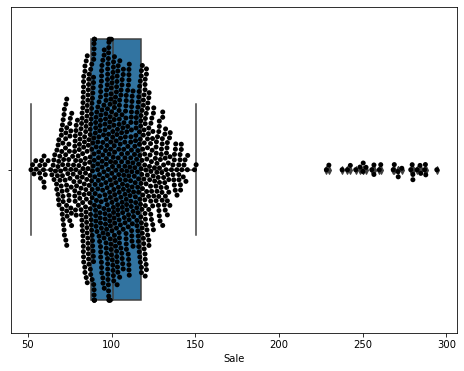

In [8]:
import seaborn as sns
sns.boxplot(df_heritage.Sale)
sns.swarmplot(df_heritage.Sale,color='black')

<AxesSubplot:xlabel='Sale'>

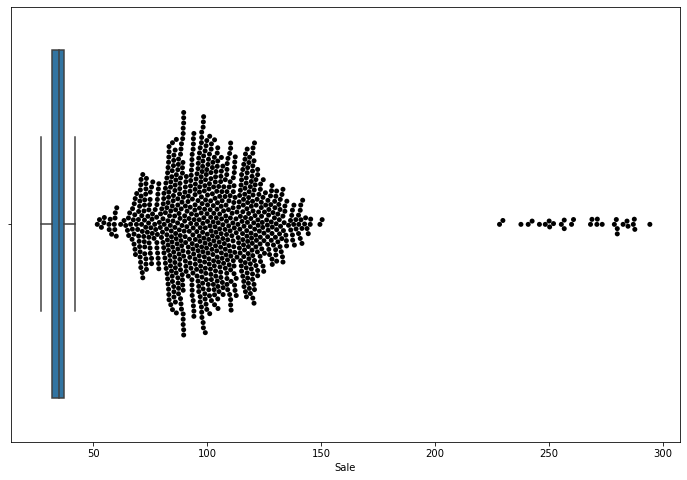

In [45]:
import seaborn as sns
sns.boxplot(df_heritage.Temperature)
sns.swarmplot(df_heritage.Sale,color='black')

In [10]:
#Plotting WEEKLY, MONTHLY, YEARLY SALES AND TEMP CHANGE
# 4. Check the Yearly, Monthly, Weekly, daily sales
# 5. Check Yearly ,Monthly, Weekly , daily Temp 

In [11]:
# df_heritage=df_heritage.set_index('Date')

In [12]:
df_heritage.sort_index()

,Date,Sale,Temperature
0,2018-04-01,74.536,36.60
1,2018-04-02,69.839,37.26
2,2018-04-03,71.016,36.94
3,2018-04-04,71.544,36.49
4,2018-04-05,70.367,36.91
...,...,...,...
879,2020-08-27,124.190,35.44
880,2020-08-28,127.402,36.49
881,2020-08-29,118.217,36.26
882,2020-08-30,120.142,34.06


In [13]:
df_heritage['weekofyear']=str()

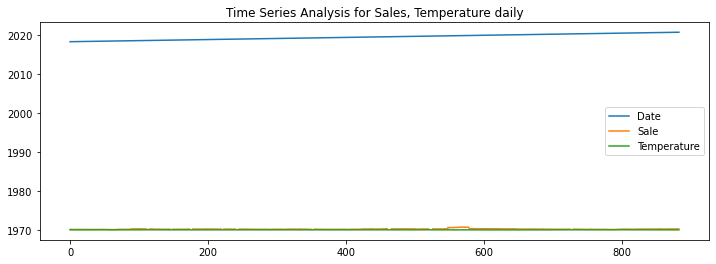

In [14]:
df_heritage.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time Series Analysis for Sales, Temperature daily')
plt.show(block=False)

In [15]:
#Weekly Analysis: 
df_heritage=df_heritage.reset_index()
df_heritage['week']=df_heritage['Date'].dt.week


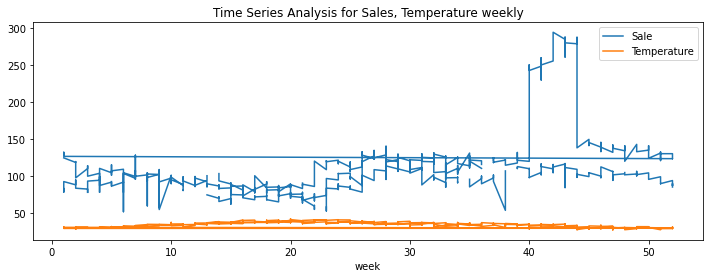

In [16]:
df_temp=df_heritage.drop(['Date'],axis=1).set_index('week')[['Sale','Temperature']]
df_temp.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time Series Analysis for Sales, Temperature weekly')
plt.show(block=False)

In [17]:
df_heritage

,index,Date,Sale,Temperature,weekofyear,week
0,0,2018-04-01,74.536,36.60,,13
1,1,2018-04-02,69.839,37.26,,14
2,2,2018-04-03,71.016,36.94,,14
3,3,2018-04-04,71.544,36.49,,14
4,4,2018-04-05,70.367,36.91,,14
...,...,...,...,...,...,...
879,879,2020-08-27,124.190,35.44,,35
880,880,2020-08-28,127.402,36.49,,35
881,881,2020-08-29,118.217,36.26,,35
882,882,2020-08-30,120.142,34.06,,35


In [18]:
data=df_heritage[['Date','Sale']]

In [19]:
data=data.set_index('Date')

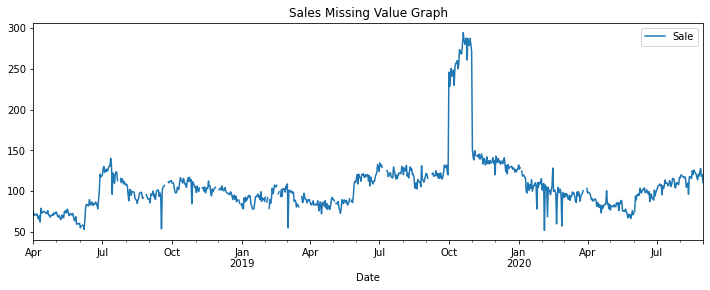

In [20]:
# For series plotting
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales Missing Value Graph')
plt.show(block=True)

## Missing value treatment

### Mean imputation

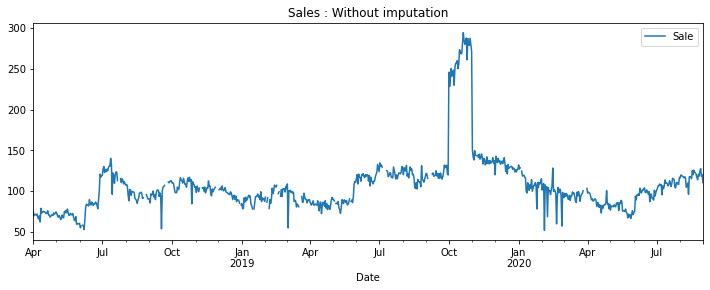

In [21]:
data = data.assign(Sales_Mean_Imputation=data.Sale.fillna(data.Sale.mean()))
data[['Sale']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales : Without imputation')
plt.show(block=False)

### Linear interpolation

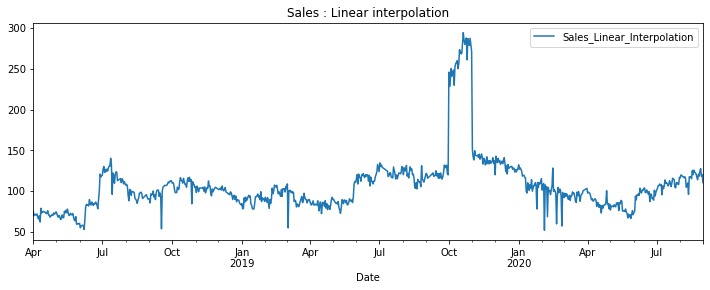

In [22]:
data = data.assign(Sales_Linear_Interpolation=data.Sale.interpolate(method='linear'))
data[['Sales_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales : Linear interpolation')
plt.show(block=False)

### Use linear interpolation to impute missing values

In [23]:
data['Sale'] = data['Sales_Linear_Interpolation']
data.drop(columns=['Sales_Mean_Imputation','Sales_Linear_Interpolation'],inplace=True)

### Getting Data for month wise and sales by sum and temperature by average

In [24]:
data.head(20)

,Sale
Date,
2018-04-01,74.536
2018-04-02,69.839
2018-04-03,71.016
2018-04-04,71.544
2018-04-05,70.367
2018-04-06,71.753
2018-04-07,67.276
2018-04-08,65.560
2018-04-09,69.509


In [25]:
data['Temperature']=df_heritage.set_index('Date')['Temperature']

In [26]:
data

,Sale,Temperature
Date,,
2018-04-01,74.536,36.60
2018-04-02,69.839,37.26
2018-04-03,71.016,36.94
2018-04-04,71.544,36.49
2018-04-05,70.367,36.91
...,...,...
2020-08-27,124.190,35.44
2020-08-28,127.402,36.49
2020-08-29,118.217,36.26


In [27]:
resampled_data=pd.DataFrame(data['Sale'].resample('1M').sum())

In [28]:
resampled_data['Temperature']=data['Temperature'].resample('1M').mean()

In [29]:
resampled_data

,Sale,Temperature
Date,,
2018-04-30,2145.6600,38.093667
2018-05-31,2137.3220,38.885806
2018-06-30,2429.9550,37.602000
2018-07-31,3714.4635,36.734839
2018-08-31,2957.7955,34.598710
2018-09-30,2982.6995,33.844667
2018-10-31,3346.1340,33.002903
2018-11-30,3080.1903,30.366667
2018-12-31,2968.5887,29.920000


## Time series Decomposition

### Additive seasonal decomposition

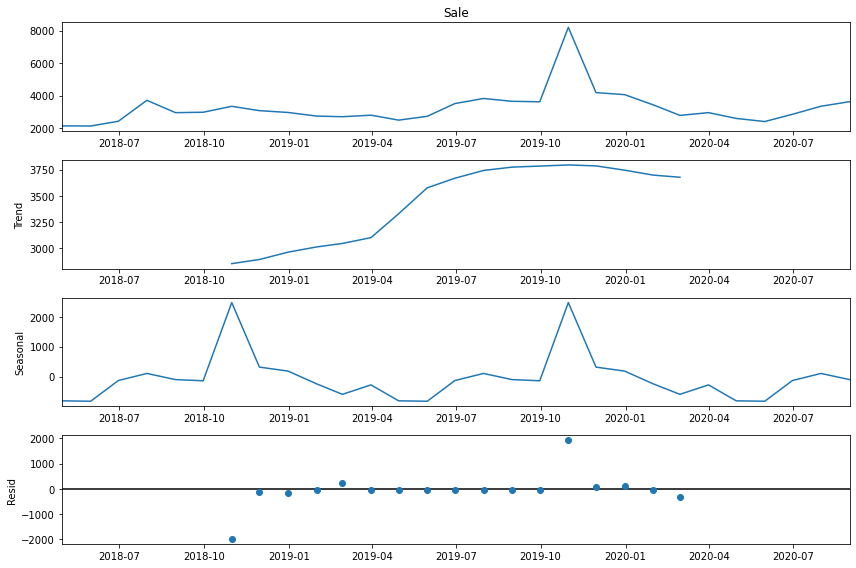

In [30]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(resampled_data.Sale, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

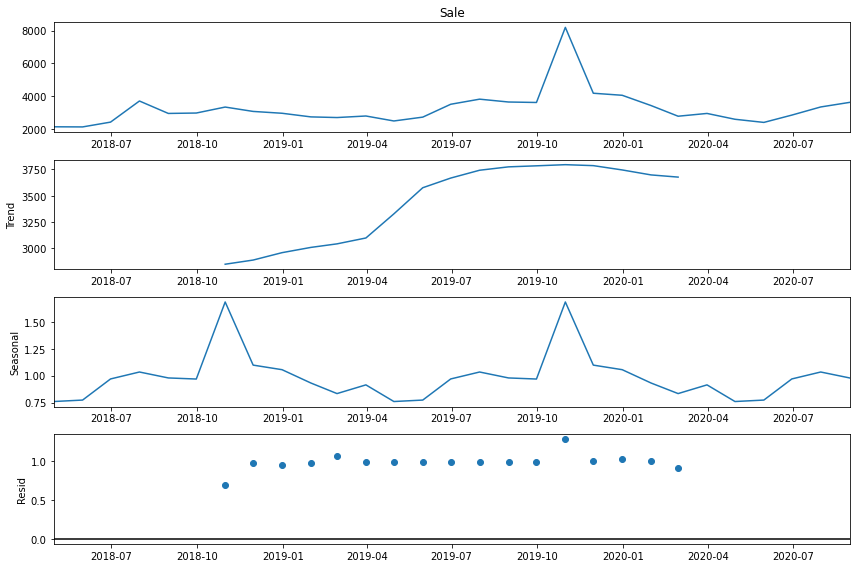

In [31]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(resampled_data.Sale, model='multiplicative') # additive seasonal index
fig = decomposition.plot()
plt.show()

In [32]:
X = data.values
X = np.log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(' mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

 mean1=4.028941, mean2=nan
variance1=0.259579, variance2=nan


In [33]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ValueError: x is required to have ndim 1 but has ndim 2

## Autocorrelation function (ACF)

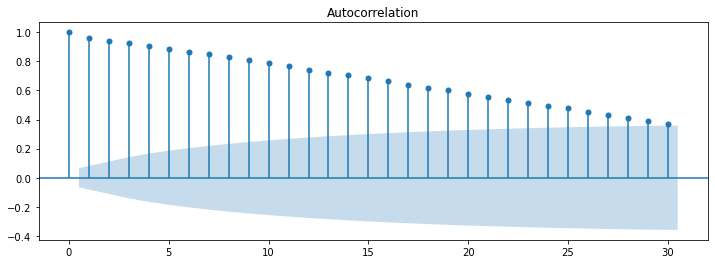

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data.Sale, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

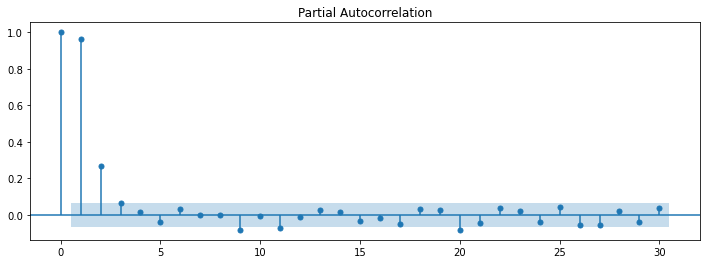

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data.Sale, ax=plt.gca(), lags = 30)
plt.show()

### Split promotion data into train and test data sets

In [36]:

train = resampled_data[:-12]
test = resampled_data[-12:]

### Build ARIMAX model

In [37]:
# train

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train.Sale, order=(1, 0, 0),exeg=train.Temperature) 
model_fit = model.fit()
print(model_fit.params)

ar.L1          0.987927
sigma2    215503.595556
dtype: float64


### Recover original time series forecast

In [39]:
y_hat_sarimax = resampled_data.copy()
y_hat_sarimax['sarimax_forecast'] = model_fit.predict(resampled_data.index.min(), resampled_data.index.max(), exog=resampled_data.Temperature)


### Plot train, test and forecast

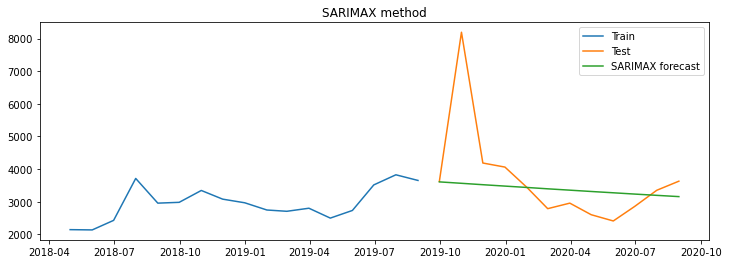

In [40]:
plt.figure(figsize=(12,4))
plt.plot(train['Sale'], label='Train')
plt.plot(test['Sale'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX method')
plt.show()

### Calculate RMSE and MAPE

In [41]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sale'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sale']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['Sale'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMAX method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.DataFrame(tempResults)
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,SARIMAX method,1425.34,18.04


## Auto regressive integrated moving average (ARIMA)

In [42]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.Sale, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.params)

const         2947.976531
ar.L1.Sale       0.580942
dtype: float64


### Recover original time series forecast

In [43]:
y_hat_sarimax = resampled_data.copy()
y_hat_sarimax['sarimax_forecast'] = model_fit.predict(resampled_data.index.min(), resampled_data.index.max())


### Plot train, test and forecast

In [89]:
k.items()

dict_items([('a', 'krishna'), ('ka', 'r')])

In [46]:
k={'a':'krishna'}

In [52]:
k.update({'ka':'rama'})

In [54]:
k.update({'ka':'r'})

In [60]:
l=[1,2,3]

In [56]:
import pandas as pd


In [61]:
pd.DataFrame(l)

,0
0,1
1,2
2,3


In [121]:
l=['a','krishna','bad','boy']

In [123]:
#list to str
k=" ".join(l)

In [124]:
#str to list
k.split()

['a', 'krishna', 'bad', 'boy']

In [127]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'temperature': [5.4, 15.3]},
index=['Germany', 'Switzerland'])
df=df.assign(temperature_1=lambda a: a.temperature * 6 / 4 + 32)
# print(df.assign(temperature_1=lambda a: a.temperature * 6 / 4 + 32))


In [130]:
a=np.array([1,2,3,4,5,6])

In [132]:
k=a.reshape(3,2)

In [135]:
k[1,:]

array([3, 4])

In [136]:
k={'a':2,'b':4}

In [ ]:
k=k{}